In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


In [106]:
mura_Dir = "MURA-v1.1/"
train_imgs_path=pd.read_csv(mura_Dir+'train_image_paths.csv',names=["Train Dataset"])
train_labels=pd.read_csv(mura_Dir+'train_labeled_studies.csv',names=["Train Labeled Studies","label"])
test_imgs_path=pd.read_csv(mura_Dir+'valid_image_paths.csv',names=["Test Dataset"])
test_labels=pd.read_csv(mura_Dir+'valid_labeled_studies.csv',names=["Test Labeled Studies","label"])

In [107]:
train_imgs_path=train_imgs_path.sort_values(by=['Train Dataset'])
train_labels=train_labels.sort_values(by=['Train Labeled Studies'])
test_imgs_path=test_imgs_path.sort_values(by=['Test Dataset'])
test_labels=test_labels.sort_values(by=['Test Labeled Studies'])

In [108]:
test_labels['Body Part']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[2])[3:])
test_labels['Study Type']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[4])[:6])

In [109]:
train_labels['Body Part']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[2])[3:])
train_labels['Study Type']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[4])[:6])

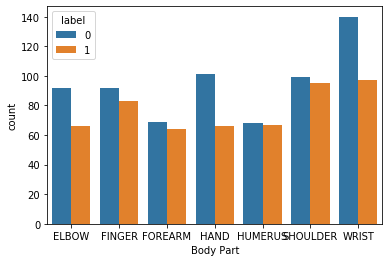

In [111]:
import seaborn as sns
sns.countplot(data=test_labels,x='Body Part',hue='label')

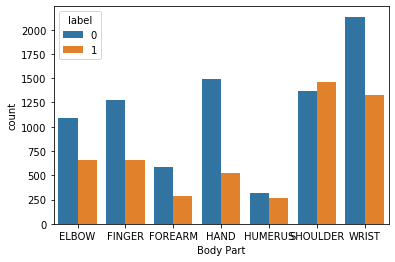

In [112]:
sns.countplot(data=train_labels,x='Body Part',hue='label')

In [8]:
import glob
import cv2
import os 

In [9]:
def fileImagesOfStudy(path):
    img_dir = path # Enter Directory of all images 
    data_path = os.path.join(img_dir,'*g')
    files = glob.glob(data_path)
    data = []
    i=0
    for f1 in files:
        i=i+1
        img = cv2.imread(f1)
        data.append(img)
           
    return data

In [44]:
import matplotlib.pyplot as plt


In [60]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [75]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [76]:
def stretching_Data(files_,dim):
    stretch=[]
    for e in range(0,len(files_)):
        f=files_.iloc[e][0]
        dd=fileImagesOfStudy(f)
        for n in range(0,len(dd)):
            stretch.append(cv2.resize(dd[n],dsize=dim))
               
    return stretch

In [77]:
def stretching_Labels(labels_):
    labels=[]
    for e in range(0,len(labels_)):
        l=labels_.iloc[e]['label']
        f=labels_.iloc[e][0]
        dd=fileImagesOfStudy(f)
        for n in range(0,len(dd)):
            labels.append(l)
    return labels

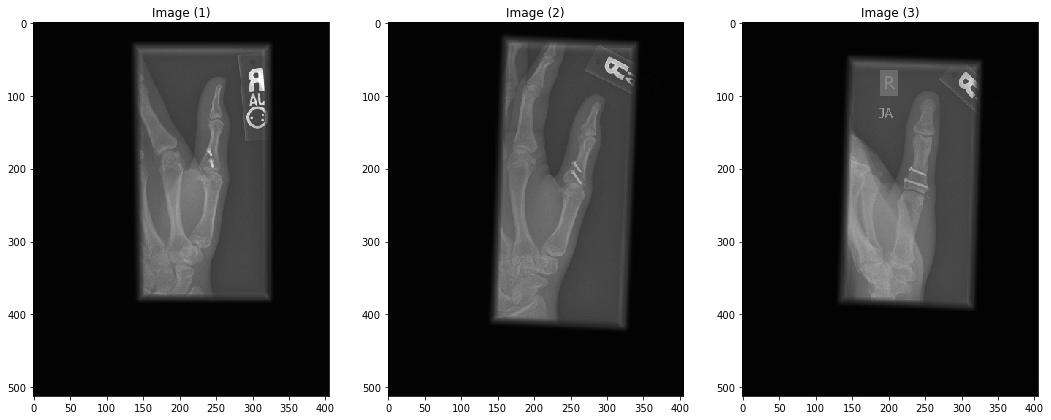

In [83]:
l=train_labels.iloc[2000]['Train Labeled Studies']
images=fileImagesOfStudy(l)
show_images(images)

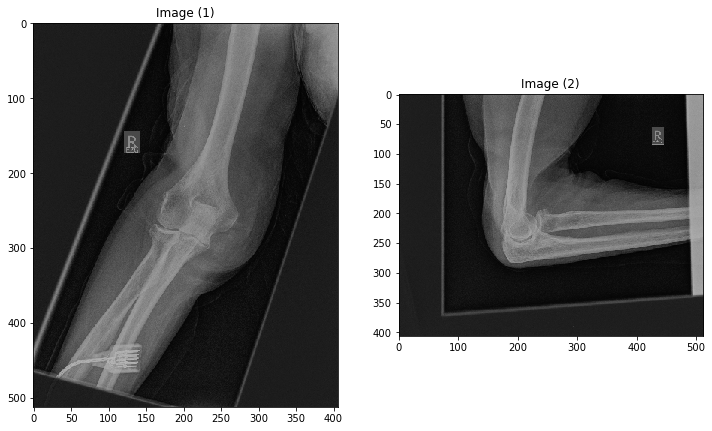

In [80]:
l=train_labels.iloc[3]['Train Labeled Studies']
images=fileImagesOfStudy(l)
show_images(images)

In [13]:
len(train_labels)

13457

In [48]:
train_labels

,Train Labeled Studies,label,Body Part,Study Type
6218,MURA-v1.1/train/XR_ELBOW/patient00011/study1_n...,0,ELBOW,study1
5866,MURA-v1.1/train/XR_ELBOW/patient00016/study1_p...,1,ELBOW,study1
6672,MURA-v1.1/train/XR_ELBOW/patient00026/study1_n...,0,ELBOW,study1
6784,MURA-v1.1/train/XR_ELBOW/patient00031/study1_n...,0,ELBOW,study1
5594,MURA-v1.1/train/XR_ELBOW/patient00034/study1_p...,1,ELBOW,study1
...,...,...,...,...
10555,MURA-v1.1/train/XR_WRIST/patient09078/study1_n...,0,WRIST,study1
10556,MURA-v1.1/train/XR_WRIST/patient09079/study1_n...,0,WRIST,study1
10557,MURA-v1.1/train/XR_WRIST/patient09080/study1_n...,0,WRIST,study1
10560,MURA-v1.1/train/XR_WRIST/patient09081/study1_n...,0,WRIST,study1


In [14]:
##Classes
train_labels_ELbow = train_labels[train_labels['Body Part'] =='ELBOW']
train_labels_FINGER = train_labels[train_labels['Body Part'] =='FINGER']
train_labels_FOREARM = train_labels[train_labels['Body Part'] =='FOREARM']
train_labels_Hand = train_labels[train_labels['Body Part'] =='HAND']
train_labels_HUMERUS = train_labels[train_labels['Body Part'] =='HUMERUS']
train_labels_SHOULDER = train_labels[train_labels['Body Part'] =='SHOULDER']
train_labels_WRIST = train_labels[train_labels['Body Part'] =='WRIST']

print(len(train_labels_ELbow))
print(len(train_labels_FINGER))
print(len(train_labels_FOREARM))
print(len(train_labels_Hand))
print(len(train_labels_HUMERUS))
print(len(train_labels_SHOULDER))
print(len(train_labels_WRIST))


1754
1935
877
2018
592
2821
3460


In [ ]:
test_labels

In [113]:
test_labels_ELbow = test_labels[test_labels['Body Part'] =='ELBOW']


In [138]:
mobile_dim=(150,150)


In [139]:
train_labels['Body Part'].unique()

array(['ELBOW', 'FINGER', 'FOREARM', 'HAND', 'HUMERUS', 'SHOULDER',
       'WRIST'], dtype=object)

In [140]:
stretchData_Mobile_Elbow_Test=stretching_Data(test_labels_ELbow,mobile_dim)
elbowLabels_Test=stretching_Labels(test_labels_ELbow)

In [141]:
elbowLabels=stretching_Labels(train_labels_ELbow)

In [142]:
print(len(elbowLabels))
print(len(stretchData_Mobile_Elbow))

4931
4931


In [143]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import tensorflow as tf
keras = tf.keras

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])


In [ ]:
stretchData_Mobile_Elbow=np.asarray(stretchData_Mobile_Elbow)
elbowLabels=np.asarray(elbowLabels)
stretchData_Mobile_Elbow_Test=np.asarray(stretchData_Mobile_Elbow_Test)
elbowLabels_Test=np.asarray(elbowLabels_Test)


In [150]:
stretchData_Mobile_Elbow.shape

(4931, 150, 150, 3)

In [126]:
from keras.layers import Input, UpSampling2D, Dense, GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.models import Model


Using TensorFlow backend.


In [122]:
history = model.fit(
    stretchData_Mobile_Elbow,
    elbowLabels,
    epochs=15,
    batch_size=100,
    validation_data=(stretchData_Mobile_Elbow_Test, elbowLabels_Test),
    verbose=1)

ValueError: You are passing a target array of shape (4931, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

In [145]:
mobile = keras.applications.mobilenet.MobileNet()


17227776/17225924 [==============================] - 11s 1us/step


ValueError: Output tensors to a Model must be the output of a Keras `Layer` (thus holding past layer metadata). Found: <keras.layers.core.Dense object at 0x000001B796ACC8D0>